<a href="https://colab.research.google.com/github/mwkinne/testMath254/blob/main/Logistic_Regression_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [3]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based on servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


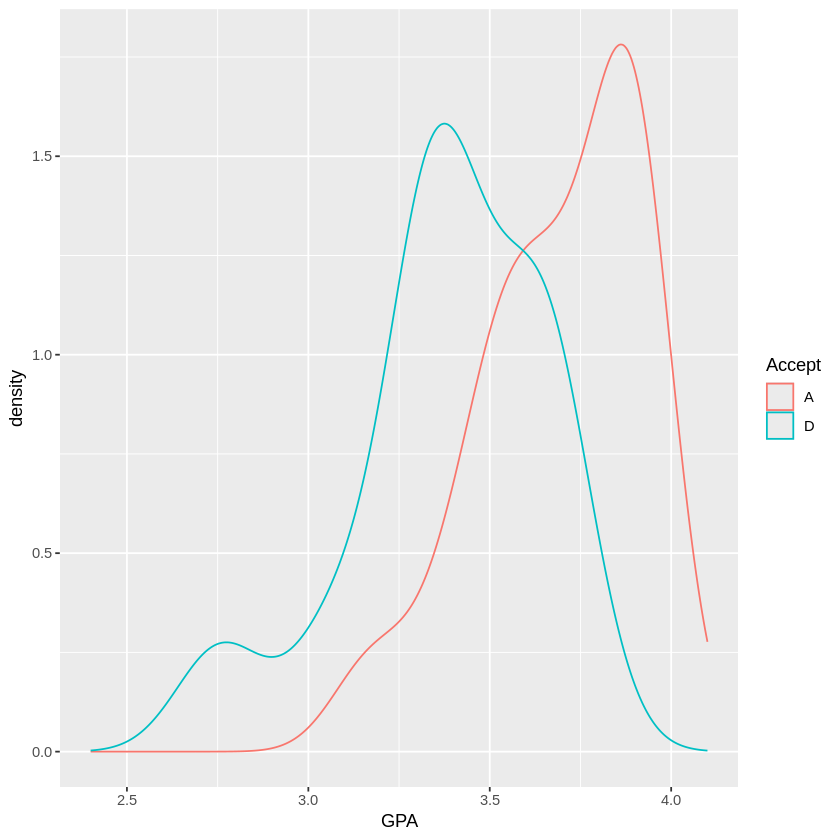

In [4]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

The distribution above indicates that there may be a higher acceptance rate with higher GPA values.


Q2: Explore the distribution of MCAT values for cccepted and denied candidates.





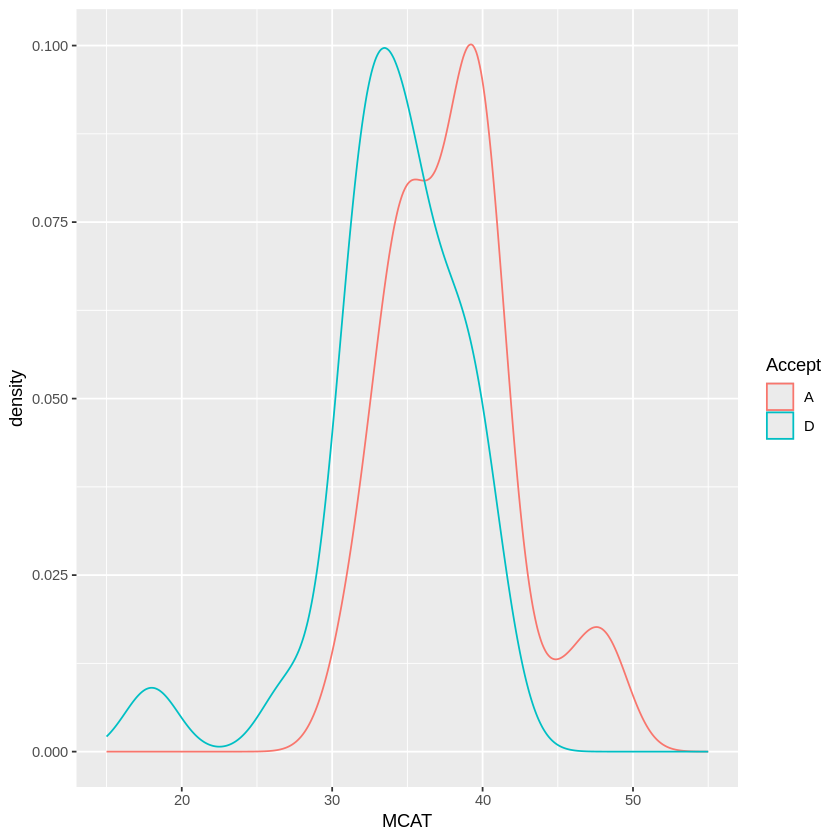

In [5]:
mydata %>%
  ggplot() +
  aes( x = MCAT, col = Accept) +
  geom_density() +
  xlim(c(15,55))

The distribution above indicates that there may be a higher acceptance rate with higher MCAT scores, yet the deviation in the two is seemingly less than that of GPA and acceptance.

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



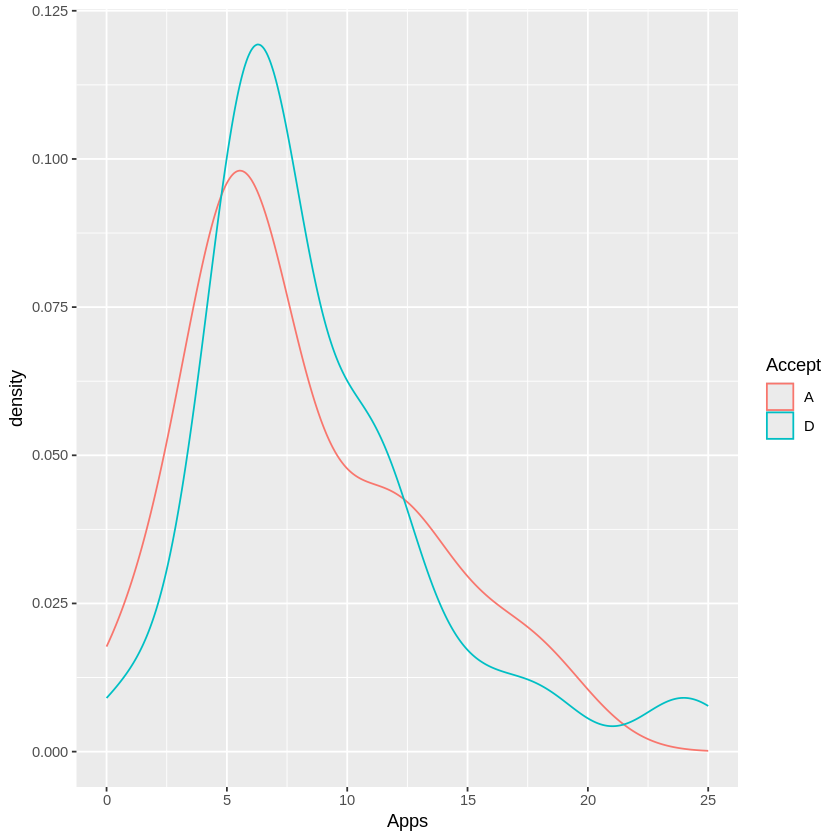

In [6]:
mydata %>%
  ggplot() +
  aes( x = Apps, col = Accept) +
  geom_density() +
  xlim(c(0,25))

The distribution above indicates that there may be a higher acceptance rate for those who have submitted roughly 12 or more applications. The inflection point of the acceptance and denial distribution lies around 12-13 applications.

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


`geom_smooth()` using formula = 'y ~ x'


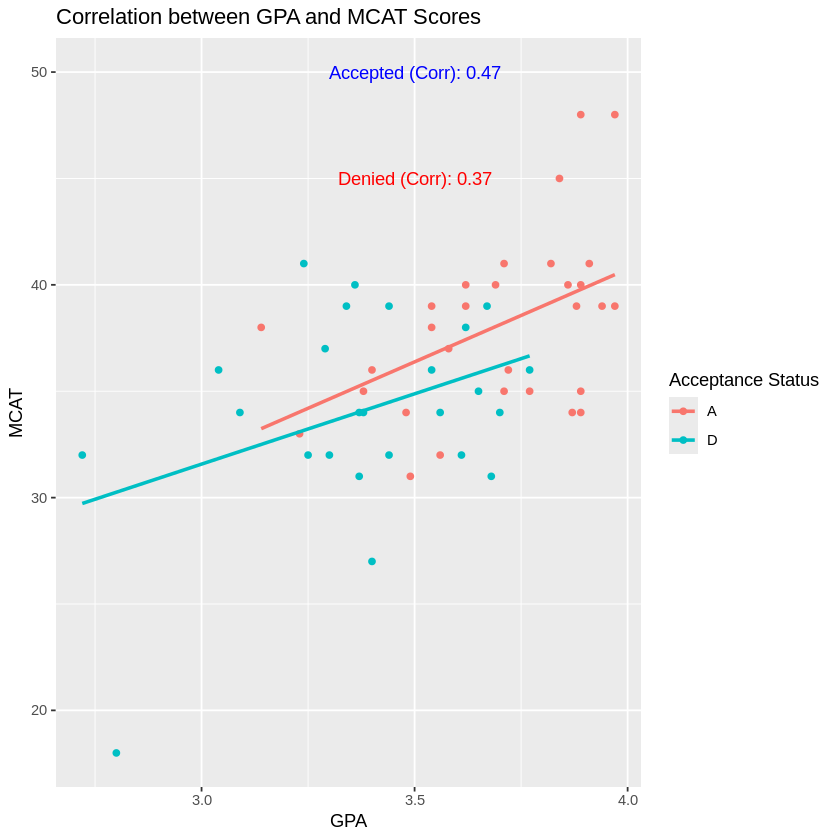

In [7]:
cor_accepted <- cor(mydata$GPA[mydata$Accept == "A"], mydata$MCAT[mydata$Accept == "A"])
cor_denied <- cor(mydata$GPA[mydata$Accept == "D"], mydata$MCAT[mydata$Accept == "D"])

mydata %>%
  ggplot(aes(x = GPA, y = MCAT, color = Accept)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Correlation between GPA and MCAT Scores",
       x = "GPA",
       y = "MCAT",
       color = "Acceptance Status") +
  annotate("text", x = 3.5, y = 50, label = paste("Accepted (Corr):", round(cor_accepted, 2)), color = "blue") +
  annotate("text", x = 3.5, y = 45, label = paste("Denied (Corr):", round(cor_denied, 2)), color = "red")

There is a higher correlation between MCAT scores and GPA for those who were accepted (roughly 0.1). Visually, the graph shows that those with higher MCAt scores tend to have higher GPA's as well. There is a large cluster of accepted data points with over 40 on the MCAt and above a 3.5 GPA.

[1] "Male Correlation"
[1] 0.5624715
[1] "Female Correlation"
[1] 0.50972


`geom_smooth()` using formula = 'y ~ x'


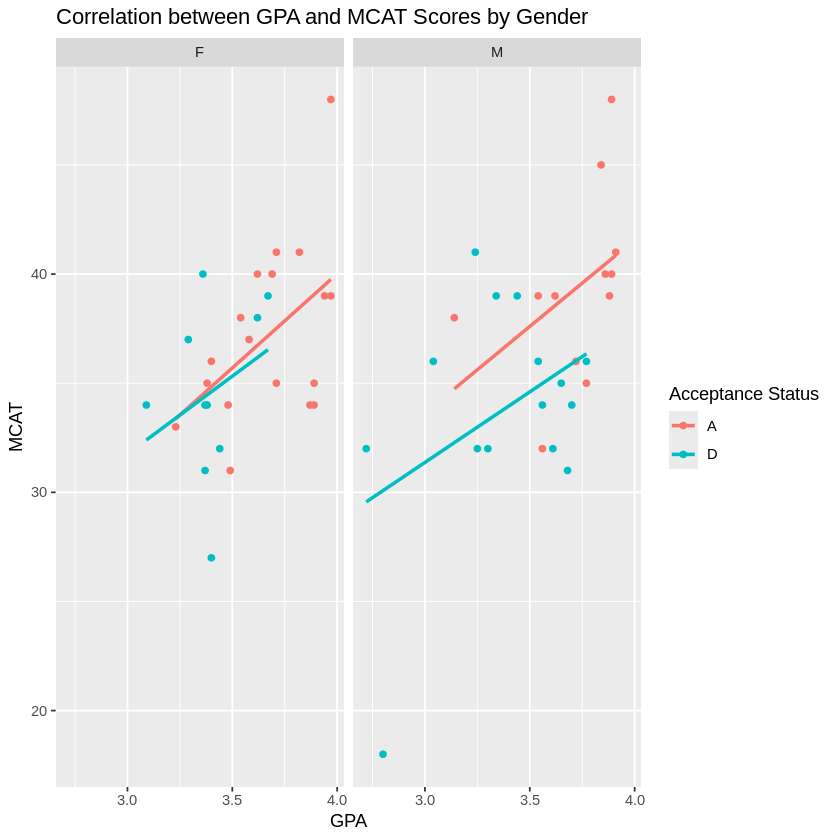

In [9]:
print("Male Correlation")
print(cor(mydata$GPA[mydata$Sex == "M"], mydata$MCAT[mydata$Sex == "M"]))
print("Female Correlation")
print(cor(mydata$GPA[mydata$Sex == "F"], mydata$MCAT[mydata$Sex == "F"]))

mydata %>%
  ggplot(aes(x = GPA, y = MCAT, color = Accept)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Correlation between GPA and MCAT Scores by Gender",
       x = "GPA",
       y = "MCAT",
       color = "Acceptance Status") +
  facet_wrap(~Sex)

Separating by gender, there does not seem to be as much of a correlation for women relative to men. The men have a large amount of accepted individuals who hold high GPA's and MCAt scores, whereas those who were rejected tend to have lower GPA's and MCAT scores. Females are not as obvious. The accepted and denied females are more mixed, and do not show a correlation between MCAT and GPA scores for those who were accepted vs denied.

Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'


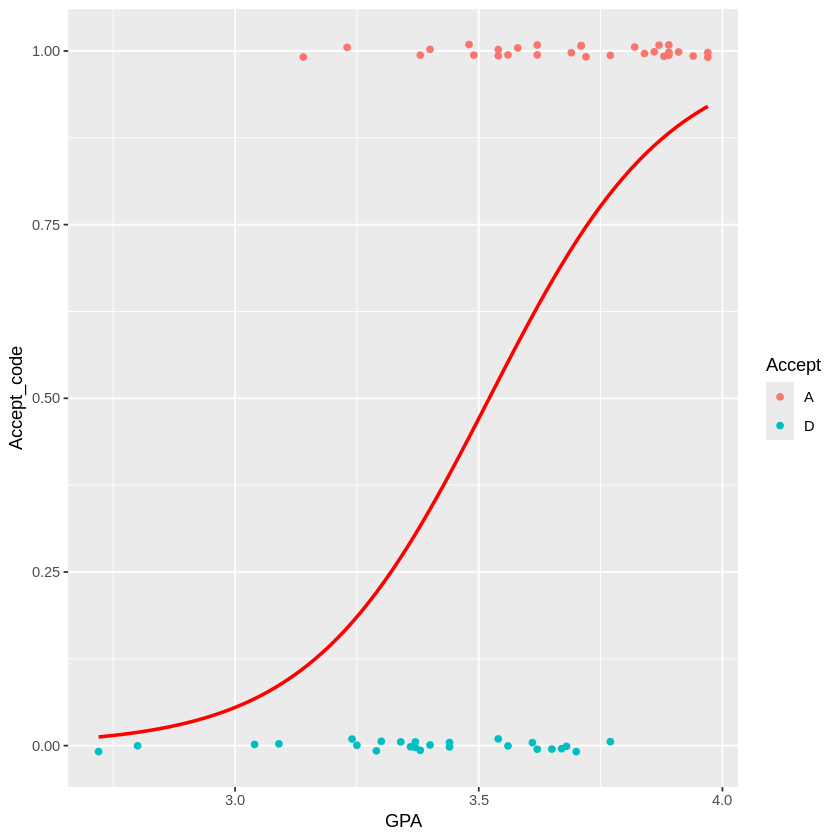

In [10]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)


Q7: Is the probability of acceptance based on GPA is similar(or different) for males and females?

`geom_smooth()` using formula = 'y ~ x'


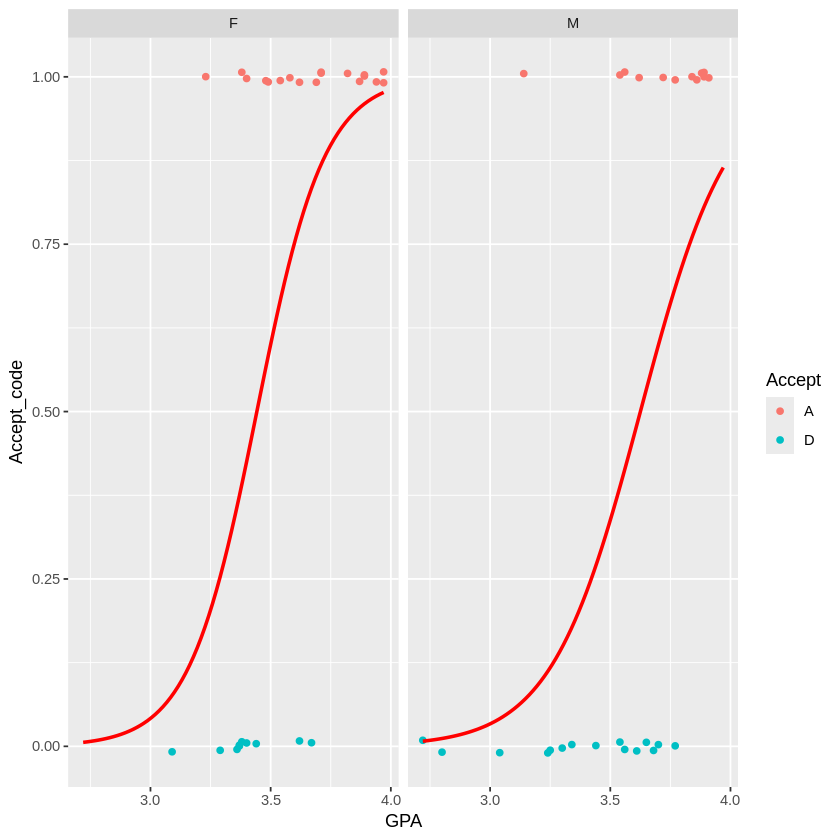

In [11]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE) +
  facet_wrap(~Sex)


Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

In [12]:
glm(Accept_code ~ GPA + Sex, data = mydata, family = "binomial")



Call:  glm(formula = Accept_code ~ GPA + Sex, family = "binomial", data = mydata)

Coefficients:
(Intercept)          GPA         SexM  
    -21.068        6.132       -1.170  

Degrees of Freedom: 54 Total (i.e. Null);  52 Residual
Null Deviance:	    75.79 
Residual Deviance: 53.94 	AIC: 59.94

Q9: Write down equations of the two fitted logistic curves.

In [13]:
# prompt: Write down equations of the two fitted logistic curves.

# The provided code fits a single logistic regression model with GPA and Sex as predictors.
# To obtain separate equations for males and females, we need to fit separate models or extract coefficients for each sex.

# Method 1:  Fitting separate models
model_male <- glm(Accept_code ~ GPA, data = subset(mydata, Sex == "M"), family = "binomial")
model_female <- glm(Accept_code ~ GPA, data = subset(mydata, Sex == "F"), family = "binomial")

# Extract coefficients and create equations
coef_male <- coef(model_male)
coef_female <- coef(model_female)

# Equations for males and females:
# log-odds(Acceptance) = intercept + coefficient*GPA
# probability = exp(log-odds) / (1 + exp(log-odds))

# Equation for Males
message("Equation for Males:")
message(paste("log-odds(Acceptance) =", coef_male[1], "+", coef_male[2], "* GPA"))

# Equation for Females
message("\nEquation for Females:")
message(paste("log-odds(Acceptance) =", coef_female[1], "+", coef_female[2], "* GPA"))


# Method 2: Using the interaction term (not directly providing two equations)
# The original code doesn't provide equations of the two fitted logistic curves.
# Instead, it shows the combined effect of GPA and Sex in one model. To create two separate equations,
# you would fit two separate logistic regression models or refit the model with an interaction term.
# An interaction term does not create separate curves. The single curve displays the impact of the combination of predictors.

# Here is how you would interpret the combined model output:

# summary(glm(Accept_code ~ GPA * Sex, data = mydata, family = "binomial"))
# An interaction term between GPA and Sex would be examined within the model summary.

Equation for Males:

log-odds(Acceptance) = -19.4842093176264 + 5.37464197166049 * GPA


Equation for Females:

log-odds(Acceptance) = -24.3852273882498 + 7.08339734973604 * GPA



Q10: What is the $R^2$ of your model?  Do you see one in your model output?

In [15]:
# prompt: What is the  𝑅^2  of your model? Do you see one in your model output?

# R-squared is not directly provided for logistic regression models in the same way it is for linear models.
# Pseudo-R-squared measures are used to assess model fit.  Several pseudo-R-squareds exist, including:
# McFadden's R-squared, Cox and Snell R-squared, and Nagelkerke R-squared.

# Here's how you can obtain these in R:

# Fit the logistic regression model again (if you haven't already)
model <- glm(Accept_code ~ GPA + Sex, data = mydata, family = "binomial")

# Use the `pscl` package for pseudo-R-squared values
# Install it first if necessary:
if(!require(pscl)){install.packages("pscl")}

library(pscl)

# Calculate and display McFadden's R-squared
mcfadden_r2 <- pR2(model)["McFadden"]
message(paste("McFadden's R-squared:", mcfadden_r2))

# Nagelkerke's R-squared (more interpretable)
nagelkerke_r2 <- pR2(model)["Nagelkerke"]
message(paste("Nagelkerke's R-squared:", nagelkerke_r2))

# Cox and Snell R-squared (often lower than Nagelkerke)
cox_and_snell_r2 <- pR2(model)["Cox and Snell"]
message(paste("Cox and Snell R-squared:", cox_and_snell_r2))

Loading required package: pscl

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pscl’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("pscl"):
“installation of package ‘pscl’ had non-zero exit status”


ERROR: Error in library(pscl): there is no package called ‘pscl’
